## Predicting which passenger survived the shipwreck in Titanic using a machine learning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(df)

891

In [5]:
df.shape

(891, 12)

### Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

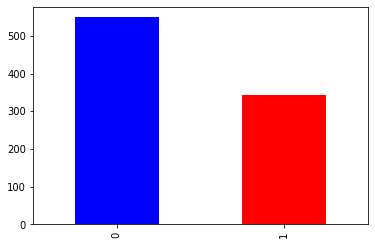

In [10]:
df["Survived"].value_counts().plot(kind="bar", color=["blue", "red"])

In [11]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Partner, Mr. Austen'

### Make a copy of data

In [13]:
df_tmp = df.copy()

In [14]:
df_tmp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


**Turn string value to categories**

In [16]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [17]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 134.4 KB


In [18]:
df_tmp["Name"].cat.categories

Index(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem',
       ...
       'Yrois, Miss. Henriette ("Mrs Harbeck")', 'Zabour, Miss. Hileni',
       'Zabour, Miss. Thamine', 'Zimmerman, Mr. Leo',
       'de Messemaeker, Mrs. Guillaume Joseph (Emma)',
       'de Mulder, Mr. Theodore', 'de Pelsmaeker, Mr. Alfons',
       'del Carlo, Mr. Sebastiano', 'van Billiard, Mr. Austin Blyler',
       'van Melkebeke, Mr. Philemon'],
      dtype='object', length=891)

In [19]:
df_tmp["Name"].value_counts()

van Melkebeke, Mr. Philemon                1
Goldschmidt, Mr. George B                  1
Graham, Miss. Margaret Edith               1
Goodwin, Mrs. Frederick (Augusta Tyler)    1
Goodwin, Mr. Charles Edward                1
                                          ..
Nilsson, Miss. Helmina Josefina            1
Nicola-Yarred, Miss. Jamila                1
Nicola-Yarred, Master. Elias               1
Nicholson, Mr. Arthur Ernest               1
Abbing, Mr. Anthony                        1
Name: Name, Length: 891, dtype: int64

In [20]:
df_tmp.Name.cat.codes

0      108
1      190
2      353
3      272
4       15
      ... 
886    548
887    303
888    413
889     81
890    220
Length: 891, dtype: int16

### Save preprocessed data

In [21]:
df_tmp.to_csv("data/titanic/train_tmp.csv", index=False)

In [22]:
# Import preprocessed data
df_tmp = pd.read_csv("data/titanic/train_tmp.csv")
df_tmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill the missing value

### Fill numeric missing value first

In [23]:
df_tmp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [25]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age


In [26]:
# Fill numeric row age with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label]=content.fillna(content.median())

In [27]:
df_tmp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Filling and turning categorical value into numbers

In [28]:
# Check for columns which are not numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [29]:
# Check which non numeric column are missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Cabin
Embarked


In [30]:
# Fill the non numeric columns
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label] = pd.Categorical(content).codes+1

In [31]:
pd.Categorical(df_tmp['Cabin']).codes

array([  0,  82,   0,  56,   0,   0, 130,   0,   0,   0, 146,  50,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 112,   0,  14,   0,   0,
         0,  64,   0,   0,   0,  42,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       102,   0,  24,  72,   0,   0,   0,   0,   0,  22,  81,   0,   0,
         0, 143,   0,   0,   0,   0,   0,   0,   0,   0, 141,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,   0,   0,
         0, 123,   0,   0,   0,  13,  92,   0,   0,   0,   0,  99,   0,
         0,   0,   0,   0,   0,   0,  53,   0,   0,   0,   0,   0,   0,
         0,  37,   0,   0,   0,   0, 117,  99,   0,   0,   0, 139,   0,
         0,   0,   0,   0,   0,   0, 108,  56,   0,  46,   0,   0,   0,
         0,   0,   0,   0,   0, 142,   0,   0,  62,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 124,   0,   0,
         0,  19,   0,   0,   0,  15,   0,   0,  70,   0,   0,   

In [32]:
pd.Categorical(df_tmp["Embarked"]).codes

array([3, 1, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3,
       2, 3, 3, 3, 1, 3, 2, 3, 1, 1, 2, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1,
       2, 3, 2, 2, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 0, 3, 3, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 2, 3, 1, 3, 1, 3,
       3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3,
       3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 3,
       2, 3, 3, 3, 3, 1, 3, 3, 3, 1, 2, 1, 3, 3, 3, 3, 2, 1, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2,
       3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 1,
       3, 3, 3, 2, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 2,

In [33]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 55.8 KB


In [34]:
df_tmp.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [35]:
%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = df_tmp.drop("Survived", axis=1)
y = df_tmp["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, X_test)

Wall time: 0 ns


ValueError: Unknown label type: 'continuous-multioutput'

In [36]:
df_tmp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,109,2,22.0,1,0,524,7.2500,0,3
1,2,1,1,191,1,38.0,1,0,597,71.2833,82,1
2,3,1,3,354,1,26.0,0,0,670,7.9250,0,3
3,4,1,1,273,1,35.0,1,0,50,53.1000,56,3
4,5,0,3,16,2,35.0,0,0,473,8.0500,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,549,2,27.0,0,0,102,13.0000,0,3
887,888,1,1,304,1,19.0,0,0,15,30.0000,31,3
888,889,0,3,414,1,28.0,1,2,676,23.4500,0,3
889,890,1,1,82,2,26.0,0,0,9,30.0000,61,1


In [37]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 55.8 KB


In [38]:
df_tmp["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [39]:
df_tmp["Age"] = df_tmp["Age"].astype(np.int64)
df_tmp["Age"]

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    28
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [40]:
df_tmp["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [41]:
df_tmp["Fare"] = df_tmp["Fare"].astype(np.int64)
df_tmp["Fare"]

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int64

In [42]:
df_tmp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,109,2,22,1,0,524,7,0,3
1,2,1,1,191,1,38,1,0,597,71,82,1
2,3,1,3,354,1,26,0,0,670,7,0,3
3,4,1,1,273,1,35,1,0,50,53,56,3
4,5,0,3,16,2,35,0,0,473,8,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,549,2,27,0,0,102,13,0,3
887,888,1,1,304,1,19,0,0,15,30,31,3
888,889,0,3,414,1,28,1,2,676,23,0,3
889,890,1,1,82,2,26,0,0,9,30,61,1


In [43]:
%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = df_tmp.drop("Survived", axis=1)
y = df_tmp["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

Wall time: 0 ns


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
clf.score(X_test, y_test)

0.8268156424581006

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = df_tmp.drop("Survived", axis=1)
y = df_tmp["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lg = LogisticRegression(max_iter=10000)
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
lg.score(X_test, y_test)

0.8100558659217877

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = df_tmp.drop("Survived", axis=1)
y = df_tmp["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
KNN.score(X_test, y_test)

0.659217877094972

In [49]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [50]:
np.mean(y_preds == y_test)

0.8268156424581006

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8268156424581006

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y)

array([0.82122905, 0.80337079, 0.87078652, 0.83707865, 0.84831461])

In [53]:
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))
clf_cross_val_score

0.8361621994852803

In [54]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(X_test)

y_probs 

array([[0.53, 0.47],
       [0.86, 0.14],
       [0.92, 0.08],
       [0.04, 0.96],
       [0.37, 0.63],
       [0.09, 0.91],
       [0.39, 0.61],
       [0.91, 0.09],
       [0.33, 0.67],
       [0.15, 0.85],
       [0.63, 0.37],
       [0.95, 0.05],
       [0.94, 0.06],
       [0.78, 0.22],
       [0.86, 0.14],
       [0.11, 0.89],
       [0.58, 0.42],
       [0.62, 0.38],
       [0.89, 0.11],
       [0.72, 0.28],
       [0.88, 0.12],
       [0.86, 0.14],
       [0.53, 0.47],
       [0.94, 0.06],
       [0.98, 0.02],
       [0.89, 0.11],
       [0.85, 0.15],
       [0.85, 0.15],
       [0.9 , 0.1 ],
       [0.32, 0.68],
       [0.98, 0.02],
       [0.44, 0.56],
       [0.85, 0.15],
       [0.42, 0.58],
       [0.83, 0.17],
       [0.76, 0.24],
       [0.63, 0.37],
       [0.26, 0.74],
       [0.09, 0.91],
       [0.99, 0.01],
       [0.9 , 0.1 ],
       [0.89, 0.11],
       [0.92, 0.08],
       [0.7 , 0.3 ],
       [0.55, 0.45],
       [0.89, 0.11],
       [0.83, 0.17],
       [0.97,

In [60]:
y_probs = y_probs[:, 1]
y_probs

array([0.47, 0.14, 0.08, 0.96, 0.63, 0.91, 0.61, 0.09, 0.67, 0.85, 0.37,
       0.05, 0.06, 0.22, 0.14, 0.89, 0.42, 0.38, 0.11, 0.28, 0.12, 0.14,
       0.47, 0.06, 0.02, 0.11, 0.15, 0.15, 0.1 , 0.68, 0.02, 0.56, 0.15,
       0.58, 0.17, 0.24, 0.37, 0.74, 0.91, 0.01, 0.1 , 0.11, 0.08, 0.3 ,
       0.45, 0.11, 0.17, 0.03, 0.19, 0.44, 0.96, 1.  , 0.04, 0.69, 0.08,
       0.91, 0.12, 0.85, 0.92, 0.82, 0.06, 0.97, 0.97, 0.13, 0.05, 0.87,
       0.08, 0.11, 0.23, 0.95, 0.95, 0.93, 0.53, 0.97, 0.03, 0.02, 0.74,
       0.97, 0.99, 0.49, 0.06, 0.84, 0.98, 0.12, 0.4 , 0.38, 0.93, 0.98,
       0.1 , 0.04, 0.26, 0.03, 0.35, 0.05, 0.03, 0.1 , 0.33, 0.05, 0.96,
       0.13, 0.12, 0.48, 0.93, 0.2 , 0.11, 0.29, 0.89, 0.19, 0.17, 0.34,
       0.96, 0.25, 0.98, 0.59, 0.48, 0.07, 0.27, 0.54, 0.92, 0.14, 0.25,
       0.92, 0.86, 0.72, 0.01, 0.3 , 0.95, 0.21, 0.48, 0.03, 0.77, 0.35,
       0.01, 0.7 , 0.38, 0.38, 0.94, 0.16, 0.06, 0.57, 0.09, 0.95, 0.05,
       0.17, 0.26, 0.93, 0.02, 0.28, 0.82, 0.04, 0.

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [62]:
fpr

array([0.        , 0.        , 0.00952381, 0.00952381, 0.00952381,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.03809524, 0.03809524, 0.03809524, 0.03809524,
       0.04761905, 0.04761905, 0.05714286, 0.05714286, 0.06666667,
       0.06666667, 0.08571429, 0.08571429, 0.1047619 , 0.1047619 ,
       0.11428571, 0.15238095, 0.15238095, 0.17142857, 0.17142857,
       0.18095238, 0.19047619, 0.2       , 0.21904762, 0.21904762,
       0.21904762, 0.22857143, 0.26666667, 0.28571429, 0.3047619 ,
       0.32380952, 0.34285714, 0.36190476, 0.38095238, 0.4       ,
       0.40952381, 0.42857143, 0.46666667, 0.48571429, 0.52380952,
       0.6       , 0.63809524, 0.65714286, 0.6952381 , 0.7047619 ,
       0.77142857, 0.82857143, 0.85714286, 0.91428571, 0.96190476,
       1.        ])

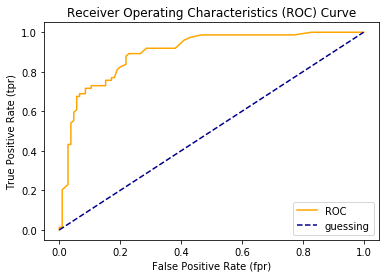

In [63]:
import matplotlib.pyplot as plt 

def plot_roc_curve(fpr, tpr):
    """
    Plot a ROC Curve given false positive rate (fpr), and true positive rate(tpr) of a classifier!
    """
    
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    plt.plot([0,1], [0,1], color="darkblue", linestyle = "--",label="guessing")
    
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [64]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

0.8987129987129988

In [65]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[94, 11],
       [20, 54]], dtype=int64)

In [72]:
pd.crosstab(y_test,
            y_preds,
           rownames=["True Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
True Labels,,
0,94,11
1,20,54


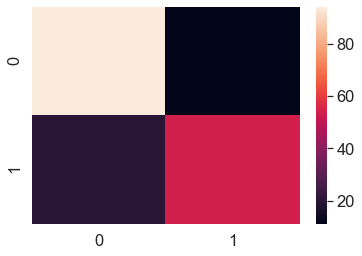

In [73]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

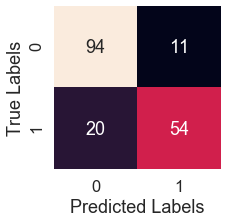

In [78]:
def plot_conf_mat(conf_mat):
    """
    Plots confusion matrix using a seaborns heatmap().
    """
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False)
    
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    
plot_conf_mat(conf_mat)

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



### Scoring 

In [81]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring = None)
cv_acc

array([0.79888268, 0.80337079, 0.85393258, 0.84269663, 0.87078652])

In [82]:
print(f'The cross validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross validated accuracy is:83.39%


In [83]:
cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
print(f'The cross validated accuracy is :{np.mean(cv_acc)*100:.2f}%')

The cross validated accuracy is :82.83%


In [84]:
cv_precision = cross_val_score(clf, X, y, scoring="precision")
print(f'The cross validated precision is:{np.mean(cv_precision)*100:.2f}%')

The cross validated precision is:83.83%


In [85]:
cv_recall = cross_val_score(clf, X, y, scoring="recall")
np.mean(cv_recall)

0.7309462915601024

In [87]:
cv_f1 = cross_val_score(clf, X, y, scoring = "f1")
np.mean(cv_f1)

0.782227549550204

In [88]:
df_tmp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,109,2,22,1,0,524,7,0,3
1,2,1,1,191,1,38,1,0,597,71,82,1
2,3,1,3,354,1,26,0,0,670,7,0,3
3,4,1,1,273,1,35,1,0,50,53,56,3
4,5,0,3,16,2,35,0,0,473,8,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,549,2,27,0,0,102,13,0,3
887,888,1,1,304,1,19,0,0,15,30,31,3
888,889,0,3,414,1,28,1,2,676,23,0,3
889,890,1,1,82,2,26,0,0,9,30,61,1


In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = df_tmp.drop("Survived", axis=1)
y = df_tmp["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test, y_preds)*100:.2f}")
print(f"Precision:{precision_score(y_test, y_preds)}")
print(f"Recall:{recall_score(y_test, y_preds)}")
print(f"f1:{f1_score(y_test, y_preds)}")


Classifier metrics on the test set
Accuracy:82.68
Precision:0.8307692307692308
Recall:0.7297297297297297
f1:0.7769784172661871


In [95]:
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparision on y_true labels vs y_preds labels in a classification model
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    
    metric_dict = {"accuracy":round(accuracy, 2),
                  "precision":round(precision, 2),
                  "recall":round(recall, 2),
                  "f1":round(f1, 2)}
    print(f'acc:{accuracy*100:.2f}%')
    print(f'precision:{precision:.2f}')
    print(f'recall:{recall:.2f}')
    print(f'f1:{f1:.2f}')
    
    return metric_dict
          
          

In [98]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
df_tmp_shuffled = df_tmp.sample(frac=1)

X = df_tmp_shuffled.drop("Survived", axis=1)
y = df_tmp_shuffled["Survived"]

# Split X and y into train and validation sets
train_split = round(0.7 * len(df_tmp_shuffled))
valid_split = round(train_split + 0.15 * len(df_tmp_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

acc:79.85%
precision:0.75
recall:0.74
f1:0.74


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.74, 'f1': 0.74}

## Hyperparameter tuning with RandomizedSearchCV

In [99]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [107]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

X = df_tmp_shuffled.drop("Survived", axis=1)
y = df_tmp_shuffled["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,
                           cv=5,
                           verbose=2)

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_le

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [109]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5}

In [110]:
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

acc:78.21%
precision:0.73
recall:0.65
f1:0.69


### Hyperparameter tuning with GridSearchCV

In [111]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [114]:
grid_2 = {"n_estimators": [100, 200, 300],
         "min_samples_split": [2],
         "min_samples_leaf": [2, 4],
         "max_features": ['auto'],
         "max_depth": [5]}

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = df_tmp_shuffled.drop("Survived", axis=1)
y = df_tmp_shuffled["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf,
                     param_grid = grid_2,
                     cv=5,
                     verbose=2)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   12.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [115]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [116]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

acc:77.65%
precision:0.72
recall:0.64
f1:0.68


In [117]:
df_test = pd.read_csv("data/titanic/test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [127]:
def preprocess_data(df):
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes+1
            
    df["Age"] = df["Age"].astype(np.int64)
    df["Fare"] = df["Fare"].astype(np.int64)
    
    return df

In [128]:
df_test = preprocess_data(df_test)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,207,2,34,0,0,153,7,0,2
1,893,3,404,1,47,1,0,222,7,0,3
2,894,2,270,2,62,0,0,74,9,0,2
3,895,3,409,2,27,0,0,148,8,0,3
4,896,3,179,1,22,1,1,139,12,0,3
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,2,27,0,0,268,8,0,3
414,1306,1,284,1,39,0,0,325,108,23,1
415,1307,3,333,2,38,0,0,347,7,0,3
416,1308,3,385,2,27,0,0,221,8,0,3


In [129]:
test_preds = gs_clf.predict(df_test)

In [130]:
test_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [131]:
df_preds = pd.DataFrame()
df_preds["PassengerId"] = df_test["PassengerId"]
df_preds["Survived"] = test_preds
df_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [132]:
df_preds.to_csv("data/titanic/test_predictions.csv", index=False)